In [1]:
from __future__ import division                                                 
from __future__ import print_function                                           
from __future__ import absolute_import 

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D              
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Dense, Flatten, Activation, Dropout
from keras.utils import np_utils
from keras.datasets import cifar10 
from keras.optimizers import SGD, Adam
from keras.callbacks import Callback as Callback
from keras import regularizers

In [4]:
np.random.seed(1671)
K.set_image_dim_ordering('tf')

In [5]:
NUM_CLASSES = 10
NUM_EPOCH = 50
BATCH_SIZE = 128   
DROPOUT_RATIO = 0.3
OPTIMIZER = Adam()

IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_CHANNELS = 3
INPUT_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
X_train /= 255
X_test /= 255

In [9]:
Y_train = np_utils.to_categorical(y_train, NUM_CLASSES)
Y_test = np_utils.to_categorical(y_test, NUM_CLASSES)

In [10]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(DROPOUT_RATIO))

model.add(Flatten())
model.add(Dense(512, kernel_regularizer=regularizers.l2(0.001))) 
model.add(Activation('relu'))
model.add(Dropout(DROPOUT_RATIO))

model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
__________

In [11]:
model.compile(loss='categorical_crossentropy',
                      optimizer=OPTIMIZER,
                      metrics=['accuracy'])

In [12]:
class TimeHistory(Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.last_epoch_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.last_epoch_start)
        
    def on_train_end(self, logs={}):
        print('\n==> Total time elapsed: ', self.total_time())
        
    def total_time(self): 
        return sum(self.times)

In [13]:
timeHistory = TimeHistory()

In [14]:
history = model.fit(X_train, Y_train,
                   batch_size=BATCH_SIZE, 
                   epochs=NUM_EPOCH,
                   callbacks=[timeHistory],
                   verbose=1,
                   validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 31s 776us/step - loss: 1.9150 - acc: 0.3999 - val_loss: 1.6213 - val_acc: 0.4925
Epoch 2/50
40000/40000 [==============================] - 29s 722us/step - loss: 1.6105 - acc: 0.4915 - val_loss: 1.5450 - val_acc: 0.5261
Epoch 3/50
40000/40000 [==============================] - 28s 707us/step - loss: 1.5326 - acc: 0.5233 - val_loss: 1.4641 - val_acc: 0.5608
Epoch 4/50
40000/40000 [==============================] - 28s 698us/step - loss: 1.5065 - acc: 0.5393 - val_loss: 1.4515 - val_acc: 0.5660
Epoch 5/50
40000/40000 [==============================] - 28s 706us/step - loss: 1.4781 - acc: 0.5501 - val_loss: 1.4415 - val_acc: 0.5759
Epoch 6/50
40000/40000 [==============================] - 28s 705us/step - loss: 1.4603 - acc: 0.5600 - val_loss: 1.4300 - val_acc: 0.5777
Epoch 7/50
40000/40000 [==============================] - 28s 708us/step - loss: 1.4416 - acc: 0.5709 - val_loss: 1.

In [15]:
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print("Test accuracy:", score[1])

10000/10000 [==============================] - 3s 273us/step
Test score: 1.3298641397476196
Test accuracy: 0.6759


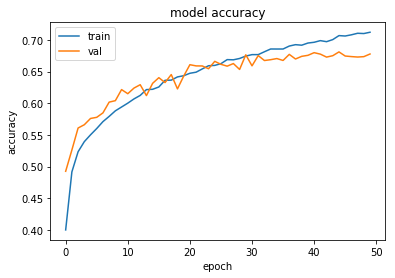

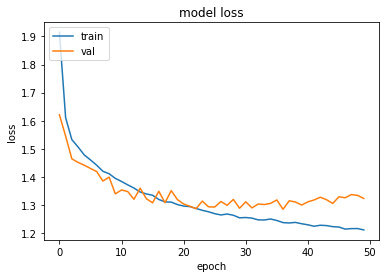

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
__________

In [18]:
model.compile(loss='categorical_crossentropy',
                      optimizer=OPTIMIZER,
                      metrics=['accuracy'])

In [19]:
history = model.fit(X_train, Y_train,
                   batch_size=BATCH_SIZE, 
                   epochs=NUM_EPOCH,
                   callbacks=[timeHistory],
                   verbose=1,
                   validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 66s 2ms/step - loss: 1.9817 - acc: 0.3034 - val_loss: 1.5967 - val_acc: 0.4431
Epoch 2/50
40000/40000 [==============================] - 68s 2ms/step - loss: 1.6187 - acc: 0.4396 - val_loss: 1.4889 - val_acc: 0.4862
Epoch 3/50
40000/40000 [==============================] - 69s 2ms/step - loss: 1.5094 - acc: 0.4773 - val_loss: 1.3991 - val_acc: 0.5195
Epoch 4/50
40000/40000 [==============================] - 69s 2ms/step - loss: 1.4367 - acc: 0.5101 - val_loss: 1.3087 - val_acc: 0.5541
Epoch 5/50
40000/40000 [==============================] - 69s 2ms/step - loss: 1.3809 - acc: 0.5325 - val_loss: 1.2581 - val_acc: 0.5820
Epoch 6/50
40000/40000 [==============================] - 69s 2ms/step - loss: 1.3400 - acc: 0.5437 - val_loss: 1.2848 - val_acc: 0.5692
Epoch 7/50
40000/40000 [==============================] - 69s 2ms/step - loss: 1.3067 - acc: 0.5626 - val_loss: 1.1806 - val_acc

In [20]:
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print("Test accuracy:", score[1])

10000/10000 [==============================] - 5s 495us/step
Test score: 0.8261859791755676
Test accuracy: 0.7462


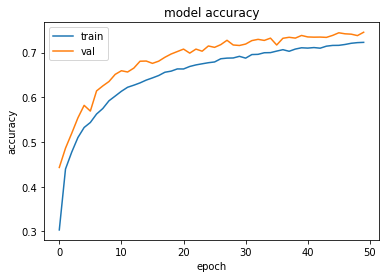

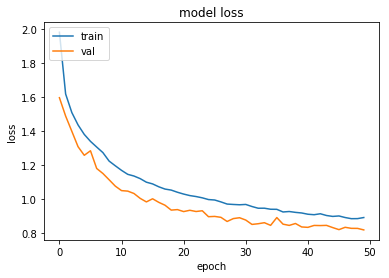

In [21]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [22]:
def show_good_and_bad(x, y, preds):
    fig = plot.figure(figsize=(10,20))
    for i in range(10):
        c = 1
        for (image, label, pred) in zip(x, y, preds):
            prediction, actual = np.argmax(pred), np.argmax(label)

            if prediction != i:
                continue

            if (c < 4 and i == actual) or (c >= 4 and i != actual):
                subplot = fig.add_subplot(10,6, i*6+c)
                subplot.set_xticks([])
                subplot.set_yticks([])
                subplot.set_title('pred %d / act %d' % (prediction, actual))
                subplot.imshow(image.reshape((32,32,3)))

                c += 1
                if c > 6:
                    break

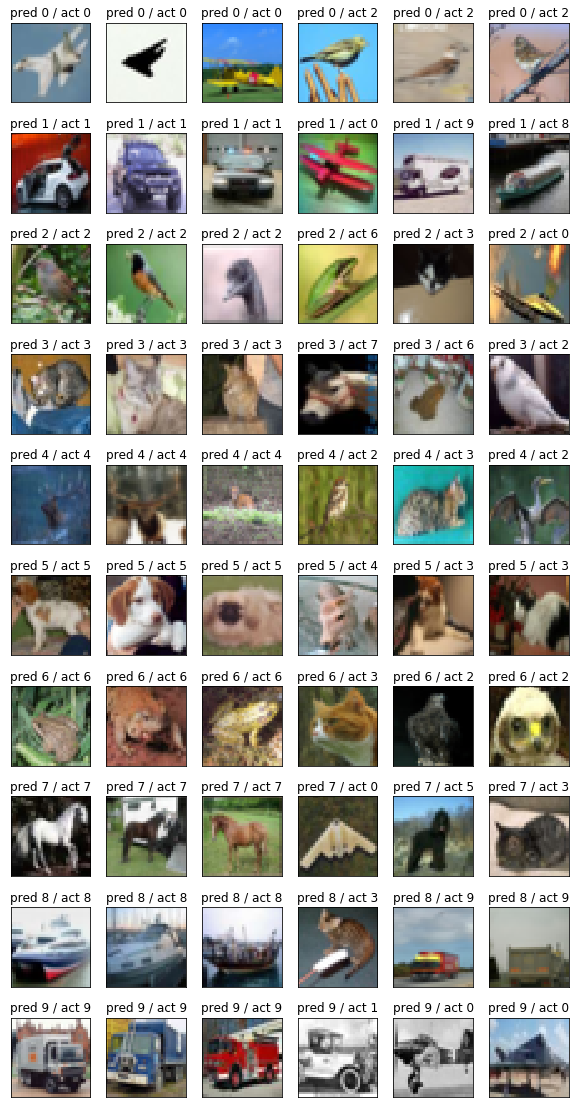

In [23]:
import matplotlib.pyplot as plot
%matplotlib inline

predictions = model.predict(x=X_test)
show_good_and_bad(X_test, Y_test, predictions)